In [ ]:
import dill

# true functions parameters
n_dimension = 1

def true_drift(x):
    result = -(4 * x**3 - 8 * x + 3) / 2
    return result.reshape(-1, 1)


def true_diffusion(x):
    result = (0.1 * x + 1) * 0.5
    return result.reshape(-1, 1)

xlim = np.array([[-2, 2]])

with open("sde_functions.pkl", "wb") as f:
    dill.dump(functions, f)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import ipynbname
script_dir = os.getcwd()
filename = ipynbname.name()

from sde.SDE_ARFF_lib import (
    SDEARFFTrain,
    NNHyperparameters
)

from sde.experiment_reports_owen import (
    PlotResults,
    sample_data
)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:


random_seed = 1
rng = np.random.default_rng(random_seed)

n_trajectories = 1
trajectory_time = 100
grid_resolution = 1000000
step_size = trajectory_time/grid_resolution

x = np.zeros((n_trajectories, n_dimension, grid_resolution + 1))

x[:, :, 0] = rng.uniform(low=xlim[:,0], high=xlim[:,1], size=(n_trajectories, n_dimension))

dW = rng.normal(loc=0, scale=np.sqrt(step_size), size=(n_trajectories, n_dimension, grid_resolution))

for i in range(grid_resolution):
    x[:, :, i+1] = x[:, :, i] + true_drift(x[:, :, i]) * step_size + true_diffusion(x[:, :, i]) * dW[:, :, i]

x_data = x[:, :, :-1].reshape(-1, n_dimension)
y_data = x[:, :, 1:].reshape(-1, n_dimension)
print(x_data.shape)
print(y_data.shape)


(1000000, 1)
(1000000, 1)


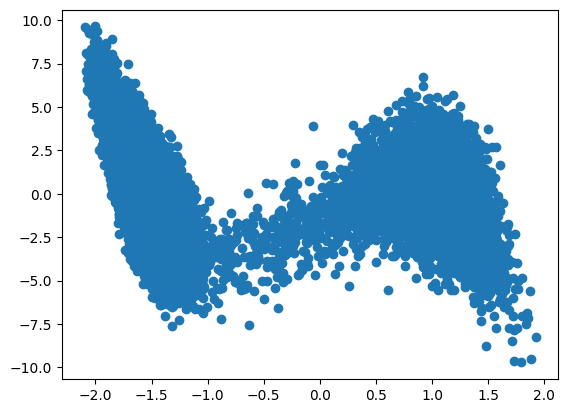

In [23]:


plt.scatter(x_data, (y_data-x_data)/step_size)